In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [3]:
df = pd.read_csv('museum_visitors.csv')

Вивести перші 5 рядків датасету.

In [7]:
print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [8]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(59, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.8+ KB
None
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [9]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

0
(59, 5)


Про які роки містить інформацію датасет.

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
print(df['Year'].unique())

[2014 2015 2016 2017 2018]


Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [12]:
df.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center', 'year']

Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [13]:
print(df.mean())

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
year                                     2015.966102
dtype: float64


<ipython-input-13-f98cceecb4a0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.mean())


Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [14]:
df_2018 = df[df['date'].str.contains("2018")]
print(df_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].min())
print(df_2018[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].max())

avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [18]:
df_2015 = df[df['date'].str.contains("2015")]
columns_to_sum = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center', 'year']
monthly_visits = df_2015.groupby(pd.to_datetime(df_2015['date']).dt.month)[columns_to_sum].sum()
max_month_num = monthly_visits.sum(axis=1).idxmax()
min_month_num = monthly_visits.sum(axis=1).idxmin()

months = ["Січень", "Лютий", "Березень", "Квітень", "Травень", "Червень", "Липень", "Серпень", "Вересень", "Жовтень", "Листопад", "Грудень"]
max_month_name = months[max_month_num - 1]
min_month_name = months[min_month_num - 1]

print(f"Місяць з найбільшою кількістю відвідувачів: {max_month_name}")
print(f"Місяць з найменшою кількістю відвідувачів: {min_month_name}")

Місяць з найбільшою кількістю відвідувачів: Травень
Місяць з найменшою кількістю відвідувачів: Лютий


Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [19]:
summer_2018 = df_2018[df_2018['date'].str.split('-').str[1].isin(['06', '07', '08'])]['avila_adobe'].sum()
winter_2018 = df_2018[df_2018['date'].str.split('-').str[1].isin(['12', '01', '02'])]['avila_adobe'].sum()
print(f"Summer 2018 visits to Avila Adobe: {summer_2018}")
print(f"Winter 2018 visits to Avila Adobe: {winter_2018}")

Summer 2018 visits to Avila Adobe: 66122
Winter 2018 visits to Avila Adobe: 30983


Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [21]:
df_2016 = df[df['date'].str.contains("2016")]
correlation = df_2016.corr(numeric_only=True)
print(correlation['year'])

avila_adobe                            NaN
firehouse_museum                       NaN
chinese_american_museum                NaN
america_tropical_interpretive_center   NaN
year                                   NaN
Name: year, dtype: float64


Побудувати теплокарту кореляції для попереднього завдання.

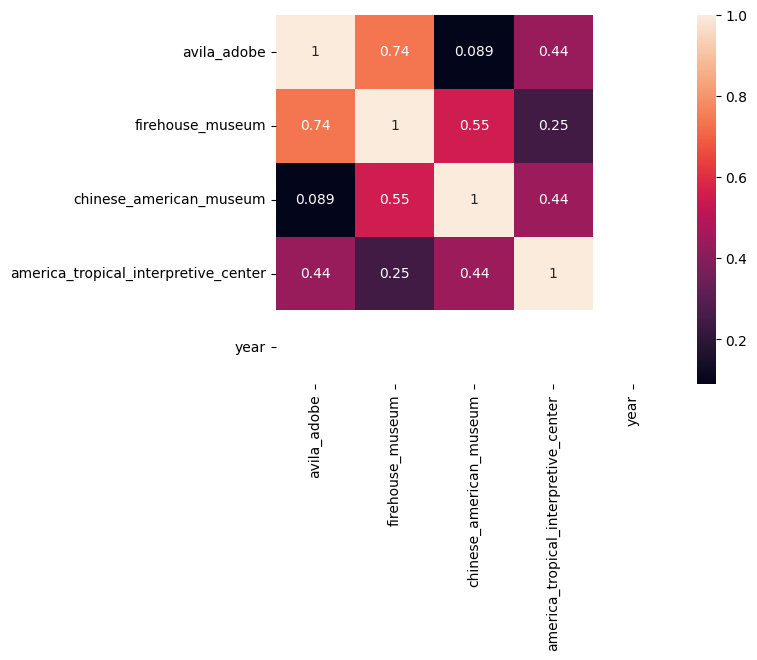

In [22]:
sns.heatmap(correlation, annot=True)
plt.show()

Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

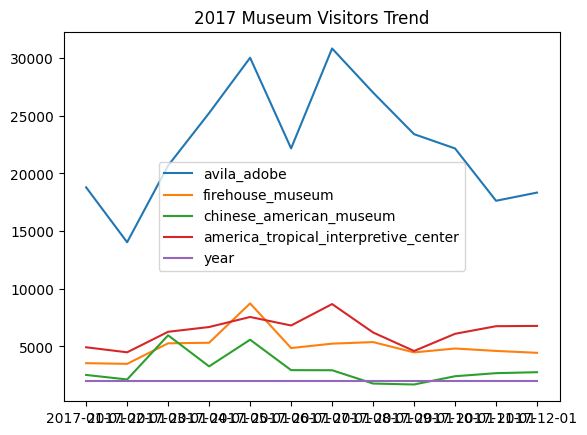

In [23]:
df_2017 = df[df['date'].str.contains("2017")]
for column in df.columns[1:]:
    plt.plot(df_2017['date'], df_2017[column], label=column)
plt.legend()
plt.title("2017 Museum Visitors Trend")
plt.show()

Побудувати графіки розсіювання для кожного музею за 2018 рік

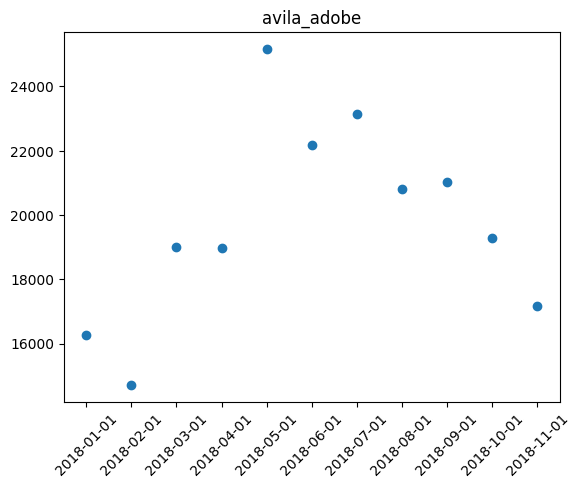

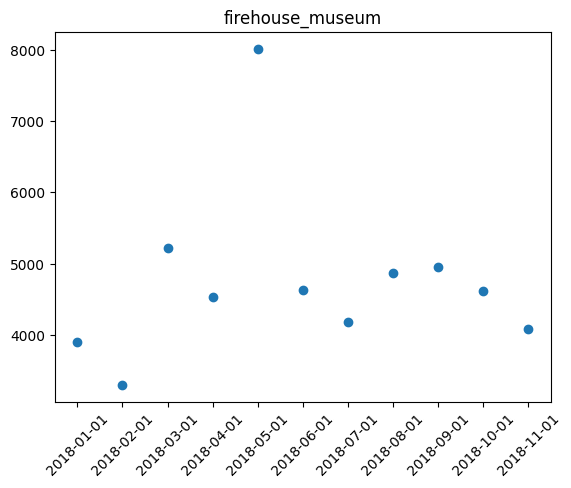

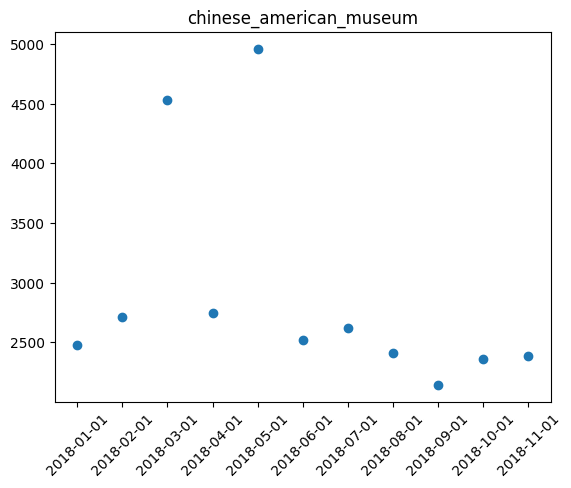

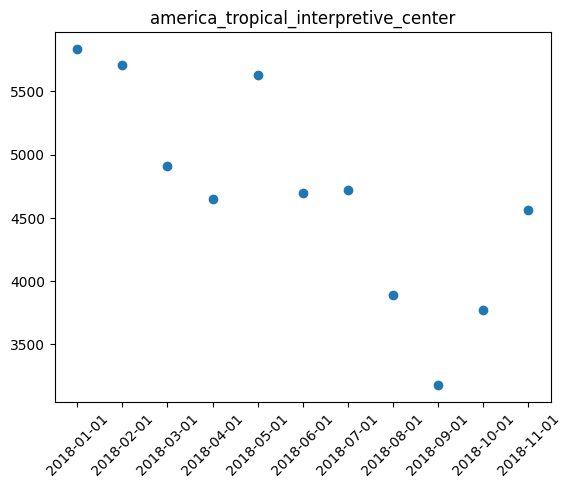

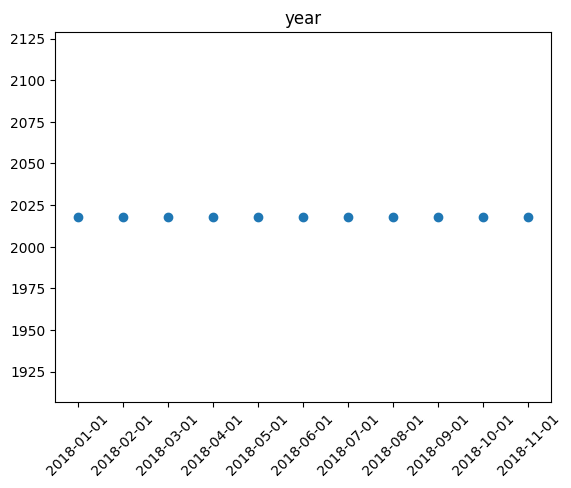

In [24]:
for column in df_2018.columns[1:]:
    plt.scatter(df_2018['date'], df_2018[column], label=column)
    plt.title(column)
    plt.xticks(rotation=45)
    plt.show()

Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

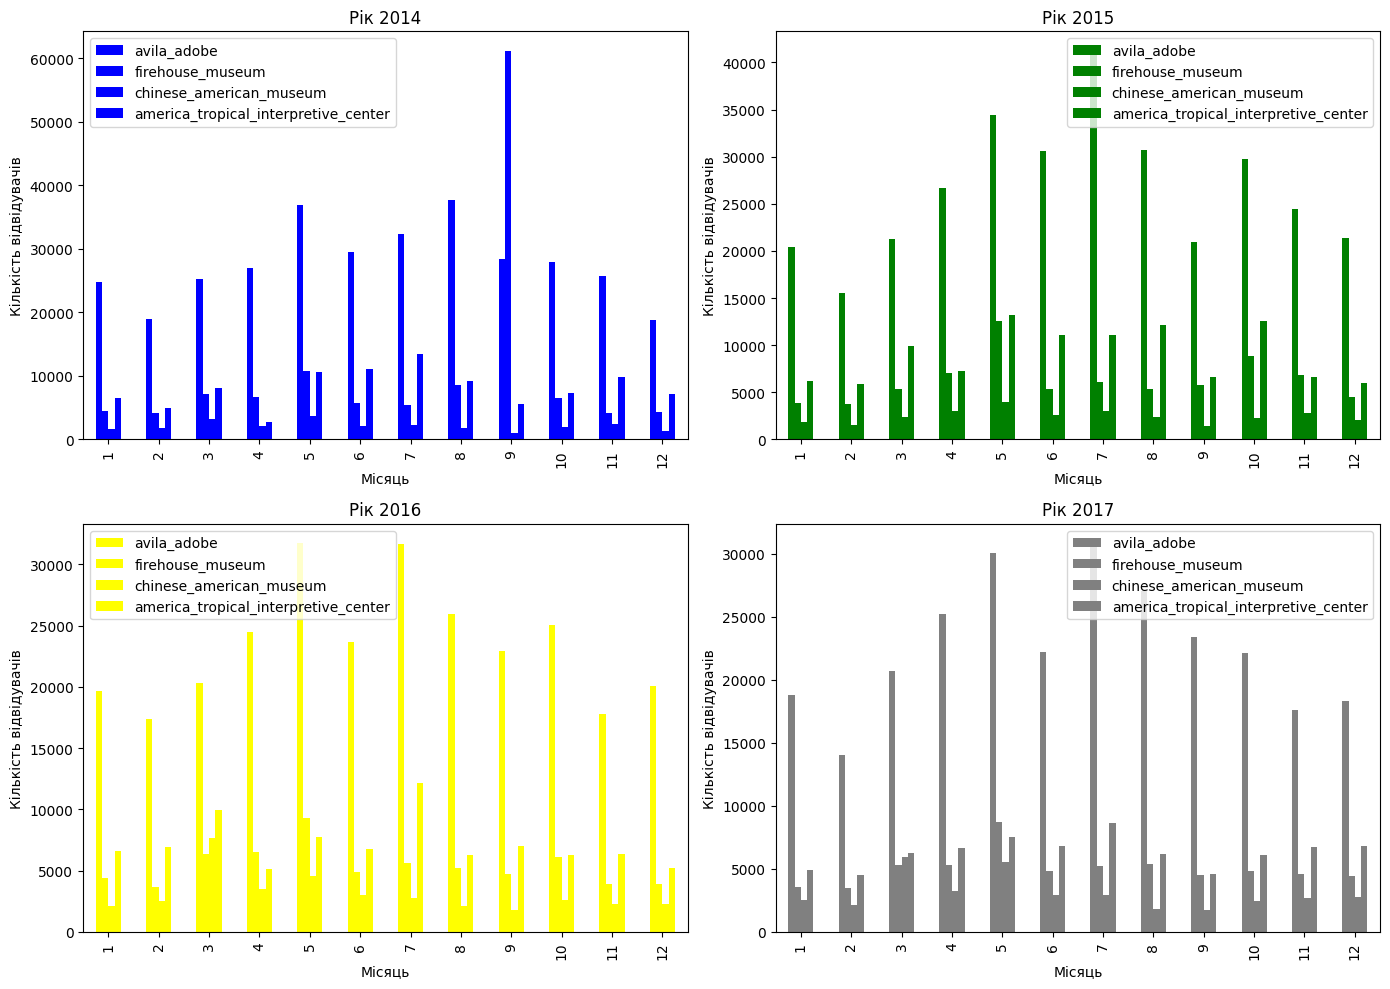

In [29]:
years = ['2014', '2015', '2016', '2017']
colors = ['blue', 'green', 'yellow', 'grey']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()
columns_to_sum = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
for idx, year in enumerate(years):
    df_year = df[df['date'].str.contains(year)]
    monthly_data = df_year.groupby(pd.to_datetime(df_year['date']).dt.month)[columns_to_sum].sum()
    monthly_data.plot(kind='bar', ax=axes[idx], color=colors[idx], title=f'Рік {year}')
    axes[idx].set_xlabel('Місяць')
    axes[idx].set_ylabel('Кількість відвідувачів')
plt.tight_layout()
plt.show()